In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq "/content/drive/MyDrive/Set.zip"

replace train_set/img_train_set/K-000250-000573-002483-006192/K-000250-000573-002483-006192_0_2_0_2_70_000_200.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

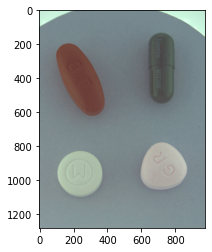

(976, 1280)


In [ ]:
img1 = Image.open('/content/train_set/img_train_set/K-000250-000573-002483-006192/K-000250-000573-002483-006192_0_2_0_2_75_000_200.png')
plt.imshow(img1)
plt.show()
print(img1.size)

잘려진 사진 크기 : (370, 550)


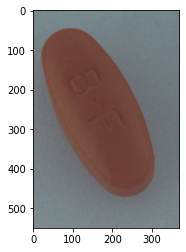

In [ ]:
croppedImage=img1.crop((80,150,450,700))
print("잘려진 사진 크기 :",croppedImage.size)
plt.imshow(croppedImage)
plt.show()

In [ ]:
file_path = '/content/train_set/label_train_set/K-000250-000573-002483-006192_json/K-000250/K-000250-000573-002483-006192_0_2_0_2_70_000_200.json'

with open(file_path, 'r') as file:
    data = json.load(file)
    #print(type(data))
    print(data)

{'images': [{'file_name': 'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png', 'width': 976, 'height': 1280, 'imgfile': 'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png', 'drug_N': 'K-000250', 'drug_S': '정상알약', 'back_color': '연회색 배경', 'drug_dir': '앞면', 'light_color': '주백색', 'camera_la': 70, 'camera_lo': 0, 'size': 200, 'dl_idx': '249', 'dl_mapping_code': 'K-000250', 'dl_name': '마그밀정(수산화마그네슘)', 'dl_name_en': 'Magmil Tab. 500mg', 'img_key': 'http://connectdi.com/design/img/drug/1NgBQQRiuc_.jpg', 'dl_material': '수산화마그네슘', 'dl_material_en': 'Magnesium Hydroxide', 'dl_custom_shape': '정제, 저작정', 'dl_company': '삼남제약(주)', 'dl_company_en': 'Samnam', 'di_company_mf': '', 'di_company_mf_en': '', 'item_seq': 197400246, 'di_item_permit_date': '19740902', 'di_class_no': '[02340]제산제', 'di_etc_otc_code': '일반의약품', 'di_edi_code': '653700240,A11800371', 'chart': '흰색의 원형정제', 'drug_shape': '원형', 'thick': 4.5, 'leng_long': 11.1, 'leng_short': 11.1, 'print_front': '마크', 'print_back': '마크', 'color_clas

In [ ]:
path = "/content/train_set/img_train_set/"
dl_name_list = []
file_name_list = []
for filename in os.listdir(path):
    if filename.endswith('.json'):
        file_path = os.path.join(path, filename)
        with open(file_path, 'r') as json_file:
            json_data = json.load(json_file)
            dl_name_list.append(json_data)
dl_name_list

[]

**차후 사용할 모델**

In [ ]:
model = tf.keras.models.Sequential()
# conv 1
model.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 2
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_class, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])